# Study 1 Plasma Stream

In [1]:
# Make imports
import import_ipynb
from run import Run
from constants import Constants
import numpy as np
import matplotlib.pyplot as plt
#import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D

from tempfile import NamedTemporaryFile
import base64 
from matplotlib import animation
from IPython.display import HTML

importing Jupyter notebook from run.ipynb
importing Jupyter notebook from batch.ipynb
importing Jupyter notebook from particle.ipynb
importing Jupyter notebook from field.ipynb
importing Jupyter notebook from constants.ipynb


### 1. Setup
This consists of the following:
1. Defining parameters
2. Creating a batch of particle
3. Updating the batch of particle

In [2]:
#Create a constants object instance to access the constants from constants.ipynb file
constants = Constants()

In [3]:
# Create a run object instance
s1 = Run()

In [4]:
# Create 100 Hydrogen ions whose:
# speeds are Maxwellian sampled, velocity directions are uniform randomly sampled
# positions are all sampled such that particles start at [-0.5, 0, 0] 
# a chamber 1m x 1m x 1m with extreme points [-0.5, -0.5, -0.5] and [0.5, 0.5, 0.5] considered
s1.create_batch_with_file_initialization('H+', constants.constants['e'][0],\
                                          constants.constants['m_H'][0] * constants.constants['amu'][0], \
                                          100, 100, 'H ions', r_index=0, v_index=1)

In [5]:
# Take the first batch in this run object
s1_batch1 = s1.batches[0]['H ions']

In [6]:
# Let's consider Electric field being flipped in direction, and taken up a few scales
E_scale = [0, 0, 1, -1, 2, -2, 3, -3, 4, -4, 5, -5]
# Let's consider a case with constant Magnetic field
B_scale = [1 for i in range(len(E_scale))]

# NOT THIS NOW EB_scale = [(i, j) for i in range(10) for j in range(10)] # list of tuples (0,0) ... (9,9)

s1_index_update = 0 # Update the first batch in this Run instance 
s1_particle_track_indices = [i for i in range(100)] # Track all 100 particles
s1_dT = 10**(-7) # 0.1 microseconds
s1_stepT = 10**(-9) # 0.001 microseconds time step
s1_E0 = 1000 # say 1000 Volts (voltage) per meter (size of chamber) 
s1_Edirn = [1,0,0] #in the x-direction [1,0,0]
s1_B0 = 10 * (10**(-3)) # Meant to say 10 mT 
s1_Bdirn = [0,1,0] #in the y-direction [0,1,0]
'''
Electric field in x-direction and Magnetic field in y-direction
will show E x B drift in z direction; sometimes up and sometimes down,
depending on the sign of the Electric field
'''

s1_argsE = [element * s1_E0 for element in s1_Edirn] # currently the uniform_E_field configuration is used
s1_argsB = [element * s1_B0 for element in s1_Bdirn] # currently the uniform_B_field configuration is used

s1_batch_ps_and_vs = dict()

for i in range(len(E_scale)):
    desc = 'E_scale = ' + str(E_scale[i]) + ' ' + 'B_scale = ' + str(B_scale[i])
    s1_batch1_ps_and_vs_once = s1.update_batch_with_unchanging_fields\
    (s1_index_update, s1_dT, s1_stepT, [elem *E_scale[i] for elem in s1_argsE], [elem *E_scale[i] for elem in s1_argsB] * B_scale[i], s1_particle_track_indices)
    s1_batch_ps_and_vs[desc] = s1_batch1_ps_and_vs_once

'''
s1_batch_ps_and_vs will be of the form : 
{ 
    'E_scale = 0 B_scale = 1': {
                                    0 (means 0th particle): [
                                                                (0 (means 0th timestep), array of position, array of velocity)
                                    ] 
    }
}

so it is a dictionary whose keys are strings describing the E and B field scales and
values are particles update history which is:
    a dictionary whose keys are intergers representing particles and values are update history for that particle
    which is:
        list of tuples (time step, position, velocity)
'''

"\ns1_batch_ps_and_vs will be of the form : \n{ \n    'E_scale = 0 B_scale = 1': {\n                                    0 (means 0th particle): [\n                                                                (0 (means 0th timestep), array of position, array of velocity)\n                                    ] \n    }\n}\n\nso it is a dictionary whose keys are strings describing the E and B field scales and\nvalues are particles update history which is:\n    a dictionary whose keys are intergers representing particles and values are update history for that particle\n    which is:\n        list of tuples (time step, position, velocity)\n"

### 2. Extract 
This includes working to maintain positions and velocities of the particles during the updates.

In [7]:
s1_descE_is_1 = 'E_scale = ' + str(E_scale[2]) + ' ' + 'B_scale = ' + str(B_scale[2])
s1_descE_is_n1 = 'E_scale = ' + str(E_scale[3]) + ' ' + 'B_scale = ' + str(B_scale[3])
# Extract update histories for two field configs
s1_histories_E1 = s1_batch_ps_and_vs[s1_descE_is_1]
s1_histories_nE1 = s1_batch_ps_and_vs[s1_descE_is_n1]

In [8]:
# Extract information on 0th particle's update history in both cases
s1_descE_is_1_p0 = s1_histories_E1[0]
s1_descE_is_n1_p0 =  s1_histories_nE1[0]

In [9]:
#Get positions and velocities of the particle's update history
s1_descE_is_1_p0_ps = []
s1_descE_is_1_p0_vs = []

for i in range(len(s1_descE_is_1_p0)):
    s1_descE_is_1_p0_ps.append(s1_descE_is_1_p0[i][1])
    s1_descE_is_1_p0_vs.append(s1_descE_is_1_p0[i][2])
    
s1_descE_is_n1_p0_ps = []
s1_descE_is_n1_p0_vs = []

for i in range(len(s1_descE_is_n1_p0)):
    s1_descE_is_n1_p0_ps.append(s1_descE_is_n1_p0[i][1])
    s1_descE_is_n1_p0_vs.append(s1_descE_is_n1_p0[i][2])

In [10]:
# Particle 0's position update history when the Electric field is scaled by 1.
s1_descE_is_1_p0_ps

[array([-0.49968556, -0.00113892, -0.00056986]),
 array([-0.49968378, -0.00114464, -0.00057272]),
 array([-0.4996819 , -0.00115036, -0.00057558]),
 array([-0.49967993, -0.00115609, -0.00057844]),
 array([-0.49967786, -0.00116181, -0.00058129]),
 array([-0.49967569, -0.00116753, -0.00058415]),
 array([-0.49967342, -0.00117326, -0.000587  ]),
 array([-0.49967105, -0.00117898, -0.00058985]),
 array([-0.49966859, -0.0011847 , -0.00059269]),
 array([-0.49966602, -0.00119043, -0.00059554]),
 array([-0.49966336, -0.00119615, -0.00059838]),
 array([-0.4996606 , -0.00120187, -0.00060122]),
 array([-0.49965774, -0.0012076 , -0.00060405]),
 array([-0.49965478, -0.00121332, -0.00060689]),
 array([-0.49965172, -0.00121904, -0.00060972]),
 array([-0.49964857, -0.00122477, -0.00061254]),
 array([-0.49964532, -0.00123049, -0.00061537]),
 array([-0.49964196, -0.00123621, -0.00061819]),
 array([-0.49963851, -0.00124193, -0.00062101]),
 array([-0.49963497, -0.00124766, -0.00062382]),
 array([-0.49963132,

### 3. Plots
This includes making plots for the position and velocities of the particles.

#### Position history of particle 0 when the electric field was scaled by 1

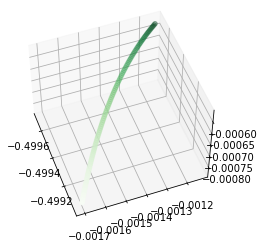

In [11]:
# Plot the position update history of particle 0 when the electric field is scaled by 1
s1_descE_is_1_p0_ps_fig = plt.figure()
s1_descE_is_1_p0_ps_ax = plt.axes(projection='3d')
s1_descE_is_1_p0_ps_ax.view_init(50, -20)

# Data for three-dimensional scattered points
# for position update history of particle 0 when the Electric field was scaled by 1
s1_descE_is_1_p0_ps_zdata = [elem[2] for elem in s1_descE_is_1_p0_ps]
s1_descE_is_1_p0_ps_xdata = [elem[0] for elem in s1_descE_is_1_p0_ps]
s1_descE_is_1_p0_ps_ydata = [elem[1] for elem in s1_descE_is_1_p0_ps]
s1_descE_is_1_p0_ps_ax.scatter3D(s1_descE_is_1_p0_ps_xdata, s1_descE_is_1_p0_ps_ydata, s1_descE_is_1_p0_ps_zdata,\
                              c=s1_descE_is_1_p0_ps_zdata, cmap='Greens');
#plt.savefig('EplusPs1', dpi='figure', format='png')

#### Position history of particle 0 when the electric field was scaled by -1

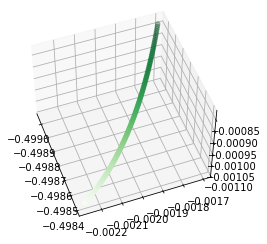

In [12]:
# Plot the position update history of particle 0 when the electric field is scaled by -1
# We see an opposite curve to the previous figure
s1_descE_is_n1_p0_ps_fig = plt.figure()
s1_descE_is_n1_p0_ps_ax = plt.axes(projection='3d')
s1_descE_is_n1_p0_ps_ax.view_init(50, -20)

# Data for three-dimensional scattered points
# for position update history of particle 0 when the Electric field was scaled by -1
s1_descE_is_n1_p0_ps_zdata = [elem[2] for elem in s1_descE_is_n1_p0_ps]
s1_descE_is_n1_p0_ps_xdata = [elem[0] for elem in s1_descE_is_n1_p0_ps]
s1_descE_is_n1_p0_ps_ydata = [elem[1] for elem in s1_descE_is_n1_p0_ps]
s1_descE_is_n1_p0_ps_ax.scatter3D(s1_descE_is_n1_p0_ps_xdata, s1_descE_is_n1_p0_ps_ydata, \
                                  s1_descE_is_n1_p0_ps_zdata, c=s1_descE_is_n1_p0_ps_zdata, cmap='Greens');
#plt.savefig('EminusPs1', dpi='figure', format='png')

#### Position history of particle 0 during all electric field values

In [13]:
# take for a field configuration
s1_allFieldkeys = list(s1_batch_ps_and_vs.keys())
s1_allfield_p0_ps = []
s1_allfield_p0_vs = []
for akey in s1_allFieldkeys:
    s1_histories = s1_batch_ps_and_vs[akey]
    
    #Take particle 0
    s1_p0 = s1_histories[0]
    
    #Take ps and vs
    for i in range(len(s1_p0)):
        s1_allfield_p0_ps.append(s1_p0[i][1])
        s1_allfield_p0_vs.append(s1_p0[i][2])
s1_allfield_p0_ps = np.array(s1_allfield_p0_ps)
s1_allfield_p0_vs = np.array(s1_allfield_p0_vs)

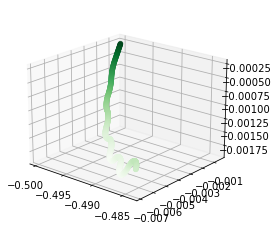

In [14]:
s1_allfield_p0_ps_fig = plt.figure()
s1_allfield_p0_ps_ax = plt.axes(projection='3d')
s1_allfield_p0_ps_ax.view_init(20, -50)

# Data for three-dimensional scattered points
# for position update history of particle 0 during all field configurations
s1_allfield_p0_ps_zdata = [elem[2] for elem in s1_allfield_p0_ps] # Animate this plot as well.
s1_allfield_p0_ps_xdata = [elem[0] for elem in s1_allfield_p0_ps]
s1_allfield_p0_ps_ydata = [elem[1] for elem in s1_allfield_p0_ps]
s1_allfield_p0_ps_ax.scatter3D(s1_allfield_p0_ps_xdata, s1_allfield_p0_ps_ydata, s1_allfield_p0_ps_zdata,\
                            c=s1_allfield_p0_ps_zdata, cmap='Greens');
#plt.savefig('ps1', dpi='figure', format='png')

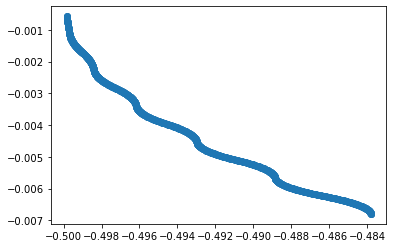

In [15]:
# Plot x and y positions
s1_allfield_p0_ps_xy_fig = plt.figure()
s1_allfield_p0_ps_xy_ax = plt.axes()
s1_allfield_p0_ps_xy_ax.scatter(s1_allfield_p0_ps_xdata, s1_allfield_p0_ps_ydata);
#plt.savefig('psxy1', dpi='figure', format='png')

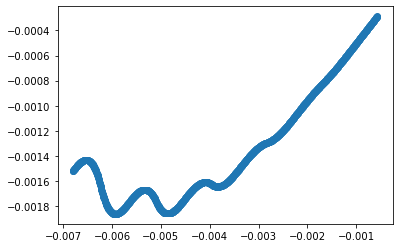

In [16]:
# Plot y and z positions
s1_allfield_p0_ps_yz_fig = plt.figure()
s1_allfield_p0_ps_yz_ax = plt.axes()
s1_allfield_p0_ps_yz_ax.scatter(s1_allfield_p0_ps_ydata, s1_allfield_p0_ps_zdata);
#plt.savefig('psyz1', dpi='figure', format='png')

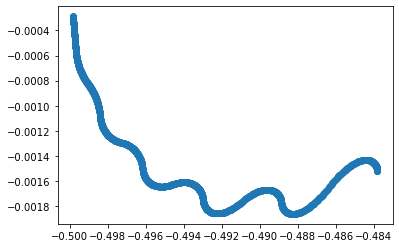

In [18]:
# Plot x and z positions
s1_allfield_p0_ps_xz_fig = plt.figure()
s1_allfield_p0_ps_xz_ax = plt.axes()
s1_allfield_p0_ps_xz_ax.scatter(s1_allfield_p0_ps_xdata, s1_allfield_p0_ps_zdata);
#plt.savefig('psxz1', dpi='figure', format='png')

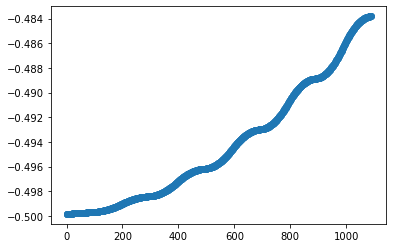

In [19]:
# Plot x position
s1_allfield_p0_ps_x_fig = plt.figure()
s1_allfield_p0_ps_x_ax = plt.axes()
s1_allfield_p0_ps_x_ax.scatter(np.arange(len(s1_allfield_p0_ps_xdata)), s1_allfield_p0_ps_xdata);
#plt.savefig('psx1', dpi='figure', format='png')

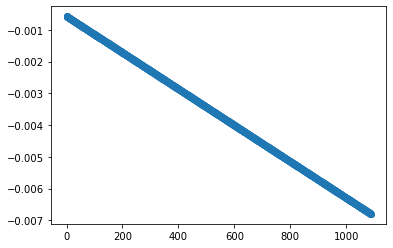

In [20]:
# Plot y position
s1_allfield_p0_ps_y_fig = plt.figure()
s1_allfield_p0_ps_y_ax = plt.axes()
s1_allfield_p0_ps_y_ax.scatter(np.arange(len(s1_allfield_p0_ps_ydata)), s1_allfield_p0_ps_ydata);
#plt.savefig('psy1', dpi='figure', format='png')

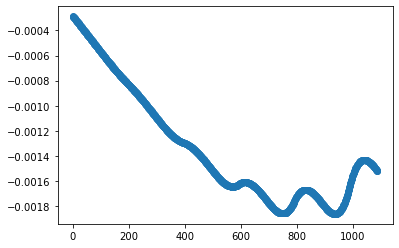

In [21]:
# Plot z position
s1_allfield_p0_ps_z_fig = plt.figure()
s1_allfield_p0_ps_z_ax = plt.axes()
s1_allfield_p0_ps_z_ax.scatter(np.arange(len(s1_allfield_p0_ps_zdata)), s1_allfield_p0_ps_zdata);
#plt.savefig('psz1', dpi='figure', format='png')

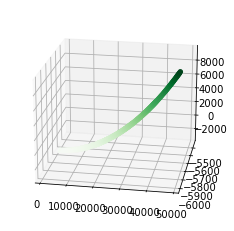

In [23]:
# Plot the velocity
s1_allfield_p0_vs_fig = plt.figure()
s1_allfield_p0_vs_ax = plt.axes(projection='3d')
s1_allfield_p0_vs_ax.view_init(20, -80)

# Data for three-dimensional scattered points
# for position update history of particle 0 during all field configurations
s1_allfield_p0_vs_zdata = [elem[2] for elem in s1_allfield_p0_vs] # Animate this plot as well.
s1_allfield_p0_vs_xdata = [elem[0] for elem in s1_allfield_p0_vs]
s1_allfield_p0_vs_ydata = [elem[1] for elem in s1_allfield_p0_vs]
s1_allfield_p0_vs_ax.scatter3D(s1_allfield_p0_vs_xdata, s1_allfield_p0_vs_ydata, s1_allfield_p0_vs_zdata,\
                            c=s1_allfield_p0_vs_zdata, cmap='Greens');
#plt.savefig('vs1', dpi='figure', format='png')

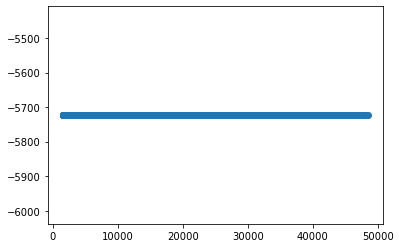

In [25]:
# Plot x and y velocities
s1_allfield_p0_vs_xy_fig = plt.figure()
s1_allfield_p0_vs_xy_ax = plt.axes()
s1_allfield_p0_vs_xy_ax.scatter(s1_allfield_p0_vs_xdata, s1_allfield_p0_vs_ydata);
#plt.savefig('vsxy1', dpi='figure', format='png')

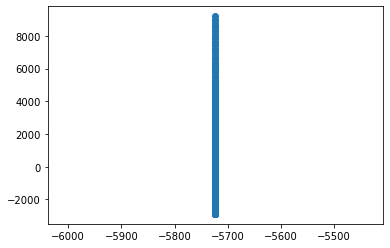

In [26]:
# Plot y and z velocities
s1_allfield_p0_vs_yz_fig = plt.figure()
s1_allfield_p0_vs_yz_ax = plt.axes()
s1_allfield_p0_vs_yz_ax.scatter(s1_allfield_p0_vs_ydata, s1_allfield_p0_vs_zdata);
#plt.savefig('vsyz1', dpi='figure', format='png')

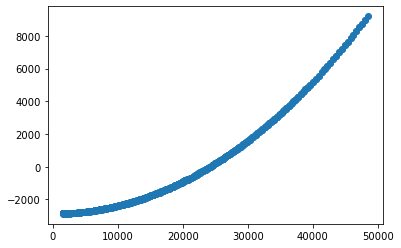

In [27]:
# Plot x and z velocities
s1_allfield_p0_vs_xz_fig = plt.figure()
s1_allfield_p0_vs_xz_ax = plt.axes()
s1_allfield_p0_vs_xz_ax.scatter(s1_allfield_p0_vs_xdata, s1_allfield_p0_vs_zdata);
#plt.savefig('vsxz1', dpi='figure', format='png')

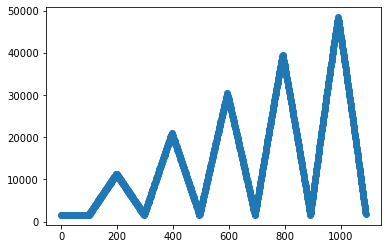

In [28]:
# Plot x velocity
s1_allfield_p0_vs_x_fig = plt.figure()
s1_allfield_p0_vs_x_ax = plt.axes()
s1_allfield_p0_vs_x_ax.scatter(np.arange(len(s1_allfield_p0_vs_xdata)), s1_allfield_p0_vs_xdata);
#plt.savefig('vsx1', dpi='figure', format='png')

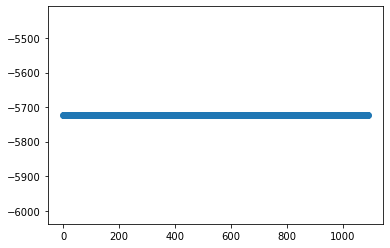

In [29]:
# Plot y velocity
s1_allfield_p0_vs_y_fig = plt.figure()
s1_allfield_p0_vs_y_ax = plt.axes()
s1_allfield_p0_vs_y_ax.scatter(np.arange(len(s1_allfield_p0_vs_ydata)), s1_allfield_p0_vs_ydata);
#plt.savefig('vsy1', dpi='figure', format='png')

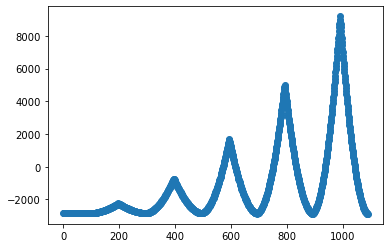

In [30]:
# Plot z velocity
s1_allfield_p0_vs_z_fig = plt.figure()
s1_allfield_p0_vs_z_ax = plt.axes()
s1_allfield_p0_vs_z_ax.scatter(np.arange(len(s1_allfield_p0_vs_zdata)), s1_allfield_p0_vs_zdata);
#plt.savefig('vsz1', dpi='figure', format='png')
'''
We can see the E cross B drift here as well
'''

### 4. Animations
This includes animations of the particle positions and velocities

#### Credit for aruxiliary code for animation
https://flothesof.github.io/charged-particle-trajectories-E-and-B-fields.html


In [31]:
VIDEO_TAG = """<video controls>
     <source src="data:video/x-m4v;base64,{0}" type="video/mp4">
     Your browser does not support the video tag.
    </video>"""

def anim_to_html(anim):
    if not hasattr(anim, '_encoded_video'):
        f = NamedTemporaryFile(suffix='.mp4', delete=False)
        anim.save(f.name, fps=20, extra_args=['-vcodec', 'libx264', '-pix_fmt', 'yuv420p'])
        f.flush()
        video = open(f.name, "rb").read()
        f.close()
        anim._encoded_video = base64.b64encode(video).decode('utf-8')

    return VIDEO_TAG.format(anim._encoded_video)



def display_animation(anim):
    plt.close(anim._fig)
    return HTML(anim_to_html(anim))

def plot_animation_3d(positions):
    '''
    This function can plot both positions and velocities
    '''

    #positions = np.array([xdata, ydata, zdata])
    FRAMES = np.shape(positions)[0]
    # Here positions has shape (198, 3) where each entry is a position which is an array of x,y,z coordinates
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    def init():
        ax.view_init(elev=10., azim=0)
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_zlabel('z')

    # animation function.  This is called sequentially
    def animate(i):
        current_index = int(positions.shape[0] / FRAMES * i)
        ax.cla()
        ax.view_init(elev=10., azim=i)
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_zlabel('z')
        # For line plot uncomment the following line
        # ax.plot3D(positions[:current_index, 0], positions[:current_index, 1], positions[:current_index, 2])
        ax.scatter3D(positions[:current_index, 0], positions[:current_index, 1], positions[:current_index, 2])
         
    # call the animator.
    anim = animation.FuncAnimation(fig, animate, init_func=init, frames=FRAMES, interval=100)
    
    return anim

In [33]:
s1_allfield_p0_ps_anim = plot_animation_3d(s1_allfield_p0_ps)

# call our new function to display the animation
display_animation(s1_allfield_p0_ps_anim)
#s1_allfield_p0_ps_anim.save(r'ps1.mp4')   #Uncomment this line to save the animation to an mp4 file

### Also say this to sir when sending the video
#### Electric field along x axis, magnetic field along y axis. The E cross B drift can be seen in the animation, 
the particle moves sometimes down sometimes up along the z-axis, as the electric field changes sign

In [34]:
def plot_animation_2d(positions, exclude):
    '''
    This function can plot both positions and velocities
    exclude can be 0, 1 or 2:
    if exclude = 2, this means exclude the z data of the given array and plot the x and y data
    '''
    
    available = [0,1,2]
    available.remove(exclude)
    
    #positions = np.array([xdata, ydata, zdata])
    FRAMES = np.shape(positions)[0]
    # Here positions has shape (198, 3) where each entry is a position which is an array of x,y,z coordinates
    fig = plt.figure()
    ax = fig.add_subplot(111)

    def init():
        ax.set_xlabel(chr(available[0] + 120))
        ax.set_ylabel(chr(available[1] + 120))

    # animation function.  This is called sequentially
    def animate(i):
        current_index = int(positions.shape[0] / FRAMES * i)
        ax.cla()
        ax.set_xlabel(chr(available[0] + 120))
        ax.set_ylabel(chr(available[1] + 120))
        # For line plot uncomment the following line
        # ax.plot3D(positions[:current_index, 0], positions[:current_index, 1], positions[:current_index, 2])
        ax.scatter(positions[:current_index, available[0]], positions[:current_index, available[1]])
         
    # call the animator.
    anim = animation.FuncAnimation(fig, animate, init_func=init, frames=FRAMES, interval=100)
    
    return anim

In [35]:
'''
x and y positions
'''
s1_allfield_p0_ps_xy_anim = plot_animation_2d(s1_allfield_p0_ps, exclude=2)

# call our new function to display the animation
display_animation(s1_allfield_p0_ps_xy_anim)
#s1_allfield_p0_ps_xy_anim.save(r'psxy1.mp4')   #Uncomment this line to save the animation to an mp4 file

In [36]:
'''
y and z positions
'''
s1_allfield_p0_ps_yz_anim = plot_animation_2d(s1_allfield_p0_ps, exclude=0)

# call our new function to display the animation
display_animation(s1_allfield_p0_ps_yz_anim)
#s1_allfield_p0_ps_yz_anim.save(r'psyz1.mp4')

In [37]:
'''
x and z positions
'''
s1_allfield_p0_ps_xz_anim = plot_animation_2d(s1_allfield_p0_ps, exclude=1)

# call our new function to display the animation
display_animation(s1_allfield_p0_ps_xz_anim)
#s1_allfield_p0_ps_xz_anim.save(r'psxz1.mp4')

In [38]:
def plot_animation_1d(positions, include):
    '''
    This function can plot both positions and velocities
    include can be 0, 1 or 2.
    if include = 2, this means plot the z data of the array
    '''
    
    #positions = np.array([xdata, ydata, zdata])
    FRAMES = np.shape(positions)[0]
    # Here positions has shape (198, 3) where each entry is a position which is an array of x,y,z coordinates
    fig = plt.figure()
    ax = fig.add_subplot(111)

    def init():
        ax.set_xlabel('step')
        ax.set_ylabel(chr(include + 120))

    # animation function.  This is called sequentially
    def animate(i):
        current_index = int(positions.shape[0] / FRAMES * i)
        ax.cla()
        ax.set_xlabel('step')
        ax.set_ylabel(chr(include + 120))
        # For line plot uncomment the following line
        # ax.plot3D(positions[:current_index, 0], positions[:current_index, 1], positions[:current_index, 2])
        ax.scatter(np.arange(len(positions))[:current_index], positions[:current_index, include])
         
    # call the animator.
    anim = animation.FuncAnimation(fig, animate, init_func=init, frames=FRAMES, interval=100)
    
    return anim

In [39]:
'''
x positions
'''
s1_allfield_p0_ps_x_anim = plot_animation_1d(s1_allfield_p0_ps, include=0)

# call our new function to display the animation
display_animation(s1_allfield_p0_ps_x_anim)
#s1_allfield_p0_ps_x_anim.save(r'psx1.mp4')   #Uncomment this line to save the animation to an mp4 file

In [40]:
'''
y positions
'''
s1_allfield_p0_ps_y_anim = plot_animation_1d(s1_allfield_p0_ps, include=1)

# call our new function to display the animation
display_animation(s1_allfield_p0_ps_y_anim)
#s1_allfield_p0_ps_y_anim.save(r'psy1.mp4')

In [41]:
'''
z positions
'''
s1_allfield_p0_ps_z_anim = plot_animation_1d(s1_allfield_p0_ps, include=2)

# call our new function to display the animation
display_animation(s1_allfield_p0_ps_z_anim)
#s1_allfield_p0_ps_z_anim.save(r'psz1.mp4')

In [42]:
# Plot the velocity
s1_allfield_p0_vs_anim = plot_animation_3d(s1_allfield_p0_vs)
display_animation(s1_allfield_p0_vs_anim)
#s1_allfield_p0_vs_anim.save(r'vs1.mp4')
'''
We can see that the velocity is constant for the time when the electric field is 0
'''

'\nWe can see that the velocity is constant for the time when the electric field is 0\n'

In [43]:
# Plot x and y velocities
s1_allfield_p0_vs_xy_anim = plot_animation_2d(s1_allfield_p0_vs, exclude=2)
display_animation(s1_allfield_p0_vs_xy_anim)
#s1_allfield_p0_vs_xy_anim.save(r'vsxy1.mp4')

In [44]:
# Plot y and z velocities
s1_allfield_p0_vs_yz_anim = plot_animation_2d(s1_allfield_p0_vs, exclude=0)
display_animation(s1_allfield_p0_vs_yz_anim)
#s1_allfield_p0_vs_yz_anim.save(r'vsyz1.mp4')

In [45]:
# Plot x and z velocities
s1_allfield_p0_vs_xz_anim = plot_animation_2d(s1_allfield_p0_vs, exclude=1)
display_animation(s1_allfield_p0_vs_xz_anim)
#s1_allfield_p0_vs_xz_anim.save(r'vsxz1.mp4')

In [46]:
# Plot x velocity
s1_allfield_p0_vs_x_anim = plot_animation_1d(s1_allfield_p0_vs, include=0)
display_animation(s1_allfield_p0_vs_x_anim)
#s1_allfield_p0_vs_x_anim.save(r'vsx1.mp4')

In [47]:
# Plot y velocity
s1_allfield_p0_vs_y_anim = plot_animation_1d(s1_allfield_p0_vs, include=1)
display_animation(s1_allfield_p0_vs_y_anim)
#s1_allfield_p0_vs_y_anim.save(r'vsy1.mp4')

In [48]:
# Plot z velocity
s1_allfield_p0_vs_z_anim = plot_animation_1d(s1_allfield_p0_vs, include=2)
display_animation(s1_allfield_p0_vs_z_anim)
#s1_allfield_p0_vs_z_anim.save(r'vsz1.mp4')

#### Multi particle plots

In [83]:
def multiplot_animation_3d(positions):
    '''
    Here each element of positions is data for 1 particle that one would give as input to
    plot_animation_3d function, i.e. position or velocity update history of 1 particle
    
    This function can plot both positions and velocities
    '''

    #positions = np.array(np.array([xdata, ydata, zdata]))
    FRAMES = np.shape(positions)[1]
    # Here positions has shape (10, 1089, 3) 
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    def init():
        ax.view_init(elev=20., azim=0)
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_zlabel('z')

    # animation function.  This is called sequentially
    def animate(i):
        current_index = int(positions.shape[1] / FRAMES * i)
        ax.cla()
        ax.view_init(elev=20., azim=i)
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_zlabel('z')
        # For line plot uncomment the following line
        # ax.plot3D(positions[:current_index, 0], positions[:current_index, 1], positions[:current_index, 2])
        for position in positions:
            ax.scatter3D(position[:current_index, 0], position[:current_index, 1], position[:current_index, 2])
         
    # call the animator.
    anim = animation.FuncAnimation(fig, animate, init_func=init, frames=FRAMES, interval=100)
    
    return anim

# Currently plots x and y positions
def multiplot_animation_2d(positions, exclude):
    '''
    Here each element of positions is data for 1 particle that one would give as input to
    plot_animation_3d function, i.e. position or velocity update history of 1 particle
    
    This function can plot both positions and velocities
    exclude can be 0, 1 or 2:
    if exclude = 2, this means exclude the z data of the given array and plot the x and y data
    '''
    
    available = [0,1,2]
    available.remove(exclude)
    
    #positions = np.array(np.array([xdata, ydata, zdata]))
    FRAMES = np.shape(positions)[1]
    # Here positions has shape (10, 1089, 3) 
    fig = plt.figure()
    ax = fig.add_subplot(111)

    def init():
        ax.set_xlabel(chr(available[0] + 120))
        ax.set_ylabel(chr(available[1] + 120))

    # animation function.  This is called sequentially
    def animate(i):
        current_index = int(positions.shape[1] / FRAMES * i)
        ax.cla()
        ax.set_xlabel(chr(available[0] + 120))
        ax.set_ylabel(chr(available[1] + 120))
        # For line plot uncomment the following line
        # ax.plot3D(positions[:current_index, 0], positions[:current_index, 1], positions[:current_index, 2])
        for position in positions:
            ax.scatter(position[:current_index, available[0]], position[:current_index, available[1]])
         
    # call the animator.
    anim = animation.FuncAnimation(fig, animate, init_func=init, frames=FRAMES, interval=100)
    
    return anim

def multiplot_animation_1d(positions, include):
    '''Here each element of positions is data for 1 particle that one would give as input to
    plot_animation_3d function, i.e. position or velocity update history of 1 particle
    
    This function can plot both positions and velocities
    include can be 0, 1 or 2.
    if include = 2, this means plot the z data of the array
    '''
    
    #positions = np.array(np.array([xdata, ydata, zdata]))
    FRAMES = np.shape(positions)[1]
    # Here positions has shape (10, 1089, 3) 
    fig = plt.figure()
    ax = fig.add_subplot(111)

    def init():
        ax.set_xlabel('step')
        ax.set_ylabel(chr(include + 120))

    # animation function.  This is called sequentially
    def animate(i):
        current_index = int(positions.shape[1] / FRAMES * i)
        ax.cla()
        ax.set_xlabel('step')
        ax.set_ylabel(chr(include + 120))
        # For line plot uncomment the following line
        # ax.plot3D(positions[:current_index, 0], positions[:current_index, 1], positions[:current_index, 2])
        for position in positions:
            ax.scatter(np.arange(len(position))[:current_index], position[:current_index, include])
         
    # call the animator.
    anim = animation.FuncAnimation(fig, animate, init_func=init, frames=FRAMES, interval=100)
    
    return anim

In [71]:
s1_particles = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90] # take particles at these indices
s1_allFieldkeys = list(s1_batch_ps_and_vs.keys())
s1_allfield_10p_ps = []
s1_allfield_10p_vs = []

for aparticle in s1_particles:
    s1_allfield_ap_ps = []
    s1_allfield_ap_vs = []
    
    # Same procedure for as a single particle
    for akey in s1_allFieldkeys:
        s1_histories = s1_batch_ps_and_vs[akey]

        #Take aparticle
        s1_ap = s1_histories[aparticle]

        #Take ps and vs
        for i in range(len(s1_p0)):
            s1_allfield_ap_ps.append(s1_ap[i][1])
            s1_allfield_ap_vs.append(s1_ap[i][2])
    s1_allfield_ap_ps = np.array(s1_allfield_ap_ps)
    s1_allfield_ap_vs = np.array(s1_allfield_ap_vs)
    
    s1_allfield_10p_ps.append(s1_allfield_ap_ps)
    s1_allfield_10p_vs.append(s1_allfield_ap_vs)

s1_allfield_10p_ps = np.array(s1_allfield_10p_ps)
s1_allfield_10p_vs = np.array(s1_allfield_10p_vs)

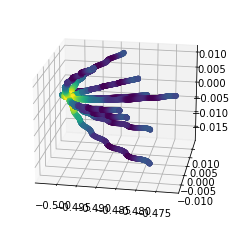

In [92]:
# Plot the positions
s1_allfield_10p_ps_fig = plt.figure()
s1_allfield_10p_ps_ax = plt.axes(projection='3d')
s1_allfield_10p_ps_ax.view_init(20, -80)

# Data for three-dimensional scattered points
for i in range(len(s1_particles)):
    
    s1_allfield_ap_ps_zdata = [elem[2] for elem in s1_allfield_10p_ps[i]] # Animate this plot as well.
    s1_allfield_ap_ps_xdata = [elem[0] for elem in s1_allfield_10p_ps[i]]
    s1_allfield_ap_ps_ydata = [elem[1] for elem in s1_allfield_10p_ps[i]]
    s1_allfield_10p_ps_ax.scatter3D(s1_allfield_ap_ps_xdata, s1_allfield_ap_ps_ydata, s1_allfield_ap_ps_zdata,\
                            c=s1_allfield_p0_ps_zdata);
#plt.savefig('multips1', dpi='figure', format='png')

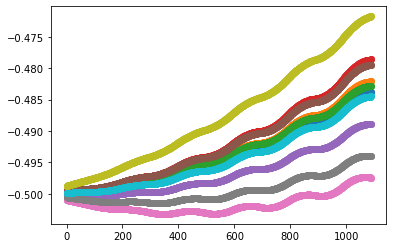

In [93]:
# Plot x positions
s1_allfield_10p_ps_x_fig = plt.figure()
s1_allfield_10p_ps_x_ax = plt.axes()
for i in range(len(s1_particles)):
    #s1_allfield_ap_ps_zdata = [elem[2] for elem in s1_allfield_10p_ps[i]] # Animate this plot as well.
    s1_allfield_ap_ps_xdata = [elem[0] for elem in s1_allfield_10p_ps[i]]
    #s1_allfield_ap_ps_ydata = [elem[1] for elem in s1_allfield_10p_ps[i]]
    s1_allfield_10p_ps_x_ax.scatter(np.arange(len(s1_allfield_ap_ps_xdata)), s1_allfield_ap_ps_xdata);
#plt.savefig('multipsx1', dpi='figure', format='png')

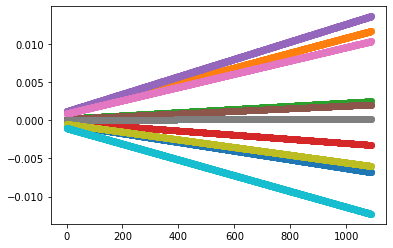

In [94]:
# Plot y positions
s1_allfield_10p_ps_y_fig = plt.figure()
s1_allfield_10p_ps_y_ax = plt.axes()
for i in range(len(s1_particles)):
    #s1_allfield_ap_ps_zdata = [elem[2] for elem in s1_allfield_10p_ps[i]] # Animate this plot as well.
    #s1_allfield_ap_ps_xdata = [elem[0] for elem in s1_allfield_10p_ps[i]]
    s1_allfield_ap_ps_ydata = [elem[1] for elem in s1_allfield_10p_ps[i]]
    s1_allfield_10p_ps_y_ax.scatter(np.arange(len(s1_allfield_ap_ps_ydata)), s1_allfield_ap_ps_ydata);
#plt.savefig('multipsy1', dpi='figure', format='png')

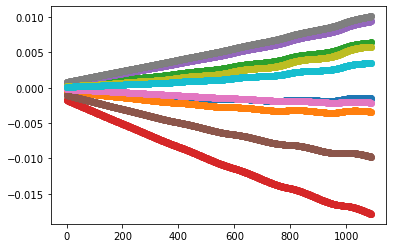

In [95]:
# Plot z positions
s1_allfield_10p_ps_z_fig = plt.figure()
s1_allfield_10p_ps_z_ax = plt.axes()
for i in range(len(s1_particles)):
    s1_allfield_ap_ps_zdata = [elem[2] for elem in s1_allfield_10p_ps[i]] # Animate this plot as well.
    #s1_allfield_ap_ps_xdata = [elem[0] for elem in s1_allfield_10p_ps[i]]
    #s1_allfield_ap_ps_ydata = [elem[1] for elem in s1_allfield_10p_ps[i]]
    s1_allfield_10p_ps_z_ax.scatter(np.arange(len(s1_allfield_ap_ps_zdata)), s1_allfield_ap_ps_zdata);
#plt.savefig('multipsz1', dpi='figure', format='png')

In [100]:
# Animate the positions
s1_allfield_10p_ps_anim = multiplot_animation_3d(s1_allfield_10p_ps)

# call our new function to display the animation
display_animation(s1_allfield_10p_ps_anim)
#s1_allfield_10p_ps_anim.save(r'multips1.mp4')   #Uncomment this line to save the animation to an mp4 file
'''
The particles are not getting closer. But going far away rather.
The scale is growing larger so the whole picture is zooming out.
That is why it looks like particles are moving closer even though they are not.
'''

'\nThe particles are not getting closer. But going far away rather.\nThe scale is growing larger so the whole picture is zooming out.\nThat is why it looks like particles are moving closer even though they are not.\n'

In [102]:
'''
x positions
'''
s1_allfield_10p_ps_x_anim = multiplot_animation_1d(s1_allfield_10p_ps, include=0)

# call our new function to display the animation
display_animation(s1_allfield_10p_ps_x_anim)
#s1_allfield_10p_ps_x_anim.save(r'multipsx1.mp4')   #Uncomment this line to save the animation to an mp4 file

In [104]:
'''
y positions
'''
s1_allfield_10p_ps_y_anim = multiplot_animation_1d(s1_allfield_10p_ps, include=1)

# call our new function to display the animation
display_animation(s1_allfield_10p_ps_y_anim)
#s1_allfield_10p_ps_y_anim.save(r'multipsy1.mp4')   #Uncomment this line to save the animation to an mp4 file

In [106]:
'''
z positions
'''
s1_allfield_10p_ps_z_anim = multiplot_animation_1d(s1_allfield_10p_ps, include=2)

# call our new function to display the animation
display_animation(s1_allfield_10p_ps_z_anim)
#s1_allfield_10p_ps_z_anim.save(r'multipsz1.mp4')   #Uncomment this line to save the animation to an mp4 file

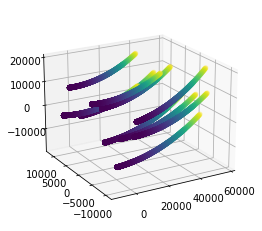

In [96]:
# Plot the velocities
s1_allfield_10p_vs_fig = plt.figure()
s1_allfield_10p_vs_ax = plt.axes(projection='3d')
s1_allfield_10p_vs_ax.view_init(20, -120)

# Data for three-dimensional scattered points
for i in range(len(s1_particles)):
    
    s1_allfield_ap_vs_zdata = [elem[2] for elem in s1_allfield_10p_vs[i]] # Animate this plot as well.
    s1_allfield_ap_vs_xdata = [elem[0] for elem in s1_allfield_10p_vs[i]]
    s1_allfield_ap_vs_ydata = [elem[1] for elem in s1_allfield_10p_vs[i]]
    s1_allfield_10p_vs_ax.scatter3D(s1_allfield_ap_vs_xdata, s1_allfield_ap_vs_ydata, s1_allfield_ap_vs_zdata,\
                            c=s1_allfield_p0_vs_zdata);
#plt.savefig('multivs1', dpi='figure', format='png')

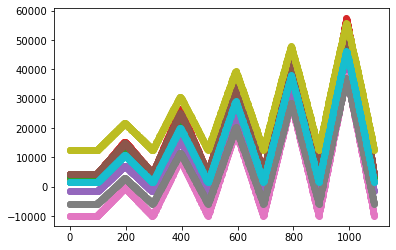

In [97]:
# Plot x velocities
s1_allfield_10p_vs_x_fig = plt.figure()
s1_allfield_10p_vs_x_ax = plt.axes()
for i in range(len(s1_particles)):
    #s1_allfield_ap_vs_zdata = [elem[2] for elem in s1_allfield_10p_vs[i]] # Animate this plot as well.
    s1_allfield_ap_vs_xdata = [elem[0] for elem in s1_allfield_10p_vs[i]]
    #s1_allfield_ap_vs_ydata = [elem[1] for elem in s1_allfield_10p_vs[i]]
    s1_allfield_10p_vs_x_ax.scatter(np.arange(len(s1_allfield_ap_vs_xdata)), s1_allfield_ap_vs_xdata);
#plt.savefig('multivsx1', dpi='figure', format='png')

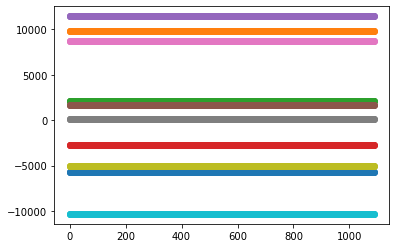

In [98]:
# Plot y velocities
s1_allfield_10p_vs_y_fig = plt.figure()
s1_allfield_10p_vs_y_ax = plt.axes()
for i in range(len(s1_particles)):
    #s1_allfield_ap_vs_zdata = [elem[2] for elem in s1_allfield_10p_vs[i]] # Animate this plot as well.
    #s1_allfield_ap_vs_xdata = [elem[0] for elem in s1_allfield_10p_vs[i]]
    s1_allfield_ap_vs_ydata = [elem[1] for elem in s1_allfield_10p_vs[i]]
    s1_allfield_10p_vs_y_ax.scatter(np.arange(len(s1_allfield_ap_vs_ydata)), s1_allfield_ap_vs_ydata);
#plt.savefig('multivsy1', dpi='figure', format='png')

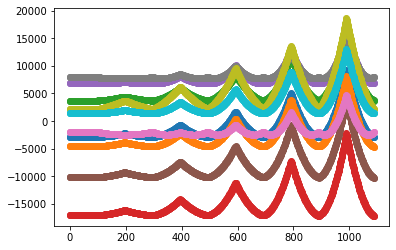

In [99]:
# Plot z velocities
s1_allfield_10p_vs_z_fig = plt.figure()
s1_allfield_10p_vs_z_ax = plt.axes()
for i in range(len(s1_particles)):
    s1_allfield_ap_vs_zdata = [elem[2] for elem in s1_allfield_10p_vs[i]] # Animate this plot as well.
    #s1_allfield_ap_vs_xdata = [elem[0] for elem in s1_allfield_10p_vs[i]]
    #s1_allfield_ap_vs_ydata = [elem[1] for elem in s1_allfield_10p_vs[i]]
    s1_allfield_10p_vs_z_ax.scatter(np.arange(len(s1_allfield_ap_vs_zdata)), s1_allfield_ap_vs_zdata);
#plt.savefig('multivsz1', dpi='figure', format='png')

In [108]:
# Animate the velocities
s1_allfield_10p_vs_anim = multiplot_animation_3d(s1_allfield_10p_vs)

# call our new function to display the animation
display_animation(s1_allfield_10p_vs_anim)
#s1_allfield_10p_vs_anim.save(r'multivs1.mp4')   #Uncomment this line to save the animation to an mp4 file

In [110]:
'''
x velocities
'''
s1_allfield_10p_vs_x_anim = multiplot_animation_1d(s1_allfield_10p_vs, include=0)

# call our new function to display the animation
display_animation(s1_allfield_10p_vs_x_anim)
#s1_allfield_10p_vs_x_anim.save(r'multivsx1.mp4')   #Uncomment this line to save the animation to an mp4 file

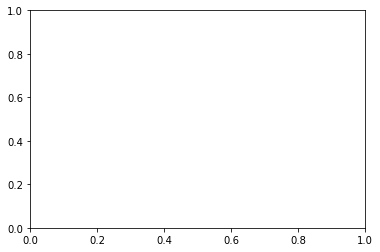

In [116]:
'''
y velocities
'''
s1_allfield_10p_vs_y_anim = multiplot_animation_1d(s1_allfield_10p_vs, include=1)

# call our new function to display the animation
display_animation(s1_allfield_10p_vs_y_anim)
#s1_allfield_10p_vs_y_anim.save(r'multivsy1.mp4')   #Uncomment this line to save the animation to an mp4 file

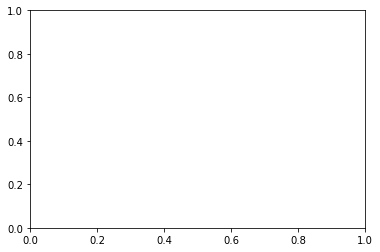

In [117]:
'''
z velocities
'''
s1_allfield_10p_vs_z_anim = multiplot_animation_1d(s1_allfield_10p_vs, include=2)

# call our new function to display the animation
display_animation(s1_allfield_10p_vs_z_anim)
#s1_allfield_10p_vs_z_anim.save(r'multivsz1.mp4')   #Uncomment this line to save the animation to an mp4 file

## Implement other field configurations
Use the field configurations: Helmholtz coil for Magnetic field, radial E field for Electric field;
so that the Electric and Magnetic field strength are around the same values as in the first case
### Multi plot for 10 particles
1. positions and velocties
2. just scatter plot for positions and velocities

Maybe later if there is time
1. single particle plots for position and velocity
2. just scatter plot for position and velocities